In [143]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
import numpy as np

In [145]:
from Model import ReferenceDependenceClass

In [146]:
model = ReferenceDependenceClass()

In [147]:
from consumption_saving import *

In [148]:
value_function_employment(model.par)


In [149]:
print(np.shape(model.par.V_e_t_a))
print(model.par.V_e_t_a)

(36, 20)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.16043149 0.16043149 0.16043149 0.16043149 0.16043149 0.16043149
  0.16043149 0.16043149 0.16043149 0.16043149 0.16043149 0.16043149
  0.16043149 0.16043149 0.16043149 0.16043149 0.16043149 0.16043149
  0.16043149 0.16043149]
 [0.31945405 0.31945405 0.31945405 0.31945405 0.31945405 0.31945405
  0.31945405 0.31945405 0.31945405 0.31945405 0.31945405 0.31945405
  0.31945405 0.31945405 0.31945405 0.31945405 0.31945405 0.31945405
  0.31945405 0.31945405]
 [0.4764732  0.4764732  0.4764732  0.4764732  0.4764732  0.4764732
  0.4764732  0.4764732  0.4764732  0.4764732  0.4764732  0.4764732
  0.4764732  0.4764732  0.4764732  0.4764732  0.4764732  0.4764732
  0.4764732  0.4764732 ]
 [0.63079537 0.63079537 0.63079537 0.63079537 0.63079537 0.63079537
  0.63079537 0.63079537 0.63079537

In [150]:
s = solve_search_and_consumption(model.par)[0]

In [151]:
s=s[:,0]

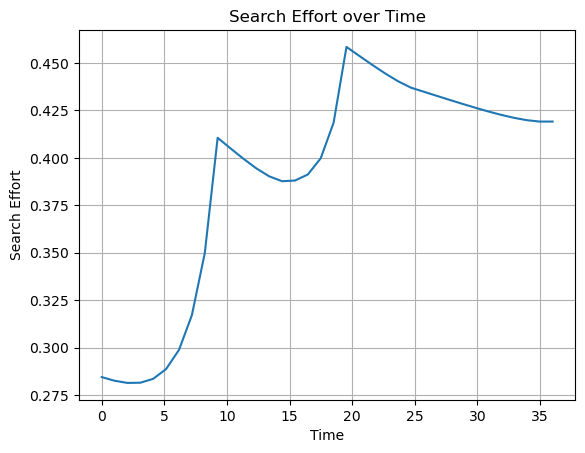

In [152]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, s)
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
